In [1]:
using PorousMaterials
using Statistics
using StatsBase
using JLD2
using Printf
using ProgressMeter
using DelimitedFiles
using PyPlot

In [2]:
@eval PorousMaterials PATH_TO_DATA = pwd()

"/home/sturlusa/my_projects/scratch/mpn_charges/adsorption_simulations"

In [3]:
sims = readdir("simulations")
henry_sims = [x for x in sims if occursin("henry", x) && occursin("1000", x)]
xtals = readdlm("henry_xtals.txt");

In [4]:
mpnn_dict = Dict([mof => -1.0 for mof in xtals])
ddec_dict = Dict([mof => -1.0 for mof in xtals])
iqeq_dict = Dict([mof => -1.0 for mof in xtals])
noq_dict = Dict([mof => -1.0 for mof in xtals])

Dict{SubString{String},Float64} with 212 entries:
  "KAVROQ_clean.cif" => -1.0
  "MAPFOY_clean.cif" => -1.0
  "LECGEH_clean.cif" => -1.0
  "TAPHOJ_clean.cif" => -1.0
  "OFODET_clean.cif" => -1.0
  "DAWBUA_clean.cif" => -1.0
  "IDAGUR_clean.cif" => -1.0
  "BASJUB_clean.cif" => -1.0
  "TECTUS_clean.cif" => -1.0
  "JAHNEM_clean.cif" => -1.0
  "DENKOX_clean.cif" => -1.0
  "HURGEH_clean.cif" => -1.0
  "PUWCUF_clean.cif" => -1.0
  "VAHSIH_clean.cif" => -1.0
  "ACUBAB_clean.cif" => -1.0
  "IVETOT_clean.cif" => -1.0
  "OCIZIL.cif"       => -1.0
  "AGESIP_clean.cif" => -1.0
  "TIRRIW_clean.cif" => -1.0
  "NEJSIG_clean.cif" => -1.0
  "LUPTAS_clean.cif" => -1.0
  "XIDBUJ_clean.cif" => -1.0
  "PURJIW_clean.cif" => -1.0
  "FUFREE_clean.cif" => -1.0
  "HAFQOW_clean.cif" => -1.0
  ⋮                  => ⋮

In [5]:
@load joinpath("simulations", henry_sims[1]) results

1-element Array{Symbol,1}:
 :results

In [6]:
results

Dict{String,Float64} with 15 entries:
  "⟨U⟩ (K)"                              => -3637.38
  "err Qst (kJ/mol)"                     => 0.241008
  "⟨U, vdw⟩ (kJ/mol)"                    => -25.6507
  "⟨U, es⟩ (kJ/mol)"                     => -4.59216
  "elapsed time (min)"                   => 1008.56
  "Qst (kJ/mol)"                         => 32.7206
  "err henry coefficient [mmol/(g-bar)]" => 1.21855
  "henry coefficient [mmol/(g-bar)]"     => 46.707
  "err ⟨U, es⟩ (kJ/mol)"                 => 0.155074
  "⟨U, vdw⟩ (K)"                         => -3085.07
  "err ⟨U, vdw⟩ (kJ/mol)"                => 0.0859338
  "⟨U, es⟩ (K)"                          => -552.31
  "⟨U⟩ (kJ/mol)"                         => -30.2429
  "henry coefficient [mol/(kg-Pa)]"      => 0.00046707
  "henry coefficient [mol/(m³-bar)]"     => 49016.5

In [7]:
for sim in henry_sims
    path = joinpath("simulations", sim)
    @load path results
    xtal = split(split(sim, "in_")[2], "_298")[1]
    if occursin("mpnn", sim) && occursin("1000", sim)
        mpnn_dict[xtal] = results["henry coefficient [mmol/(g-bar)]"]
    elseif occursin("iqeq", sim) && occursin("1000", sim)
        iqeq_dict[xtal] = results["henry coefficient [mmol/(g-bar)]"]
    elseif occursin("ddec", sim) && occursin("1000", sim)
        ddec_dict[xtal] = results["henry coefficient [mmol/(g-bar)]"]
    elseif occursin("noq", sim) && occursin("1000", sim)
        noq_dict[xtal] = results["henry coefficient [mmol/(g-bar)]"]
    end
end

In [8]:
ddec_henry = Float64[]
iqeq_henry = Float64[]
mpnn_henry = Float64[]
noq_henry = Float64[]
for xtal in xtals
    if ddec_dict[xtal] == -1.0 || iqeq_dict[xtal] == -1.0 || mpnn_dict[xtal] == -1.0 || noq_dict[xtal] == -1.0
        continue
    else
        push!(ddec_henry, ddec_dict[xtal])
        push!(iqeq_henry, iqeq_dict[xtal])
        push!(mpnn_henry, mpnn_dict[xtal])
        push!(noq_henry, noq_dict[xtal])
    end
end

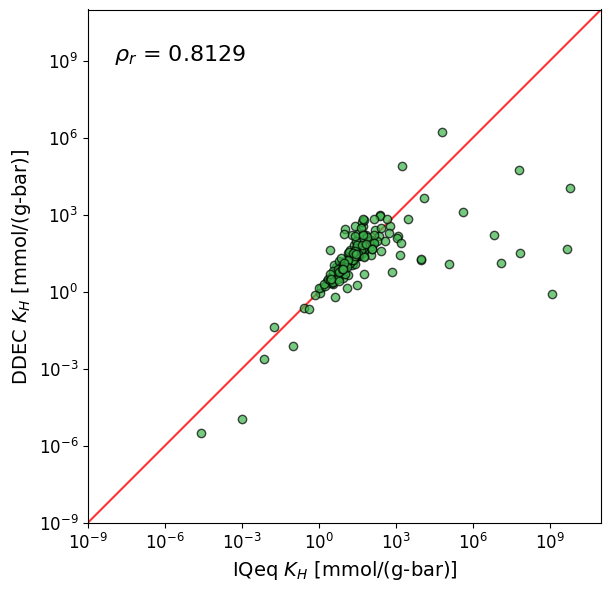

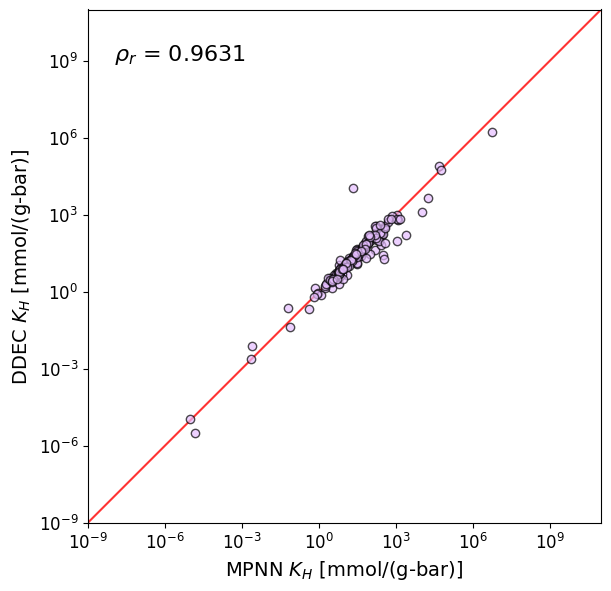

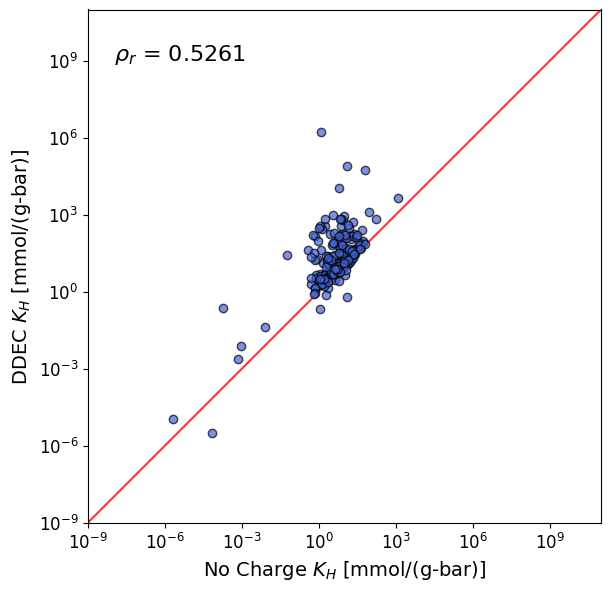

In [9]:
fig, axs = plt.subplots(figsize=(8,6))
xlim = [10^(-9), 10^11]
ylim = [10^(-9), 10^11]

#hx = axs[1].hexbin(ddec_henry, iqeq_henry, gridsize=(50, 75), mincnt=1, xscale="log", yscale="log", cmap="summer")
axs.scatter(iqeq_henry, ddec_henry, fc="#3cb44b", ec="k", alpha=0.7)
#axs[1].errorbar(ddec_henry, iqeq_henry, fmt="none", xerr=ddec_err, yerr=iqeq_err, c="g")#, fc="#3cb44b", ec="k", alpha=0.7)
axs.set_xscale("log")
axs.set_yscale("log")
#axs[1].text(xlim[1]*10, ylim[2]*0.1, @sprintf("\$R^2\$ = %.4f", R2))
axs.text(xlim[1]*10, ylim[2]*0.01, @sprintf("\$\\rho_r\$ = %.4f", corspearman(ddec_henry, iqeq_henry)), fontsize=16)
axs.set_xlabel("IQeq \$K_H\$ [mmol/(g-bar)]", fontsize=14)
axs.set_ylabel("DDEC \$K_H\$ [mmol/(g-bar)]", fontsize=14)
#plt.colorbar(hx, ax=axs[1])
axs.set_aspect("equal")
axs.plot(xlim, ylim, c="r", alpha=0.8, zorder=0.5)
axs.set_xlim(xlim)
axs.set_ylim(ylim)
plt.tight_layout()
plt.tick_params(axis="both", which="major", labelsize=12)
plt.tick_params(axis="both", which="minor", labelsize=10)
plt.savefig("henry_parity_plot_ddec_iqeq.png", format="png", dpi=300)

fig, axs = plt.subplots(figsize=(8,6))
axs.scatter(mpnn_henry, ddec_henry, fc="#e6beff", ec="k", alpha=0.7)
#axs[2].errorbar(ddec_henry, mpnn_henry, fmt="none", xerr=ddec_err, yerr=mpnn_err, c="purple")#, fc="#3cb44b", ec="k", alpha=0.7)
axs.set_xscale("log")
axs.set_yscale("log")
#axs[2].text(xlim[1]*10, ylim[2]*0.1, @sprintf("\$R^2\$ = %.4f", R2))
axs.text(xlim[1]*10, ylim[2]*0.01, @sprintf("\$\\rho_r\$ = %.4f", corspearman(ddec_henry, mpnn_henry)), fontsize=16)
axs.set_xlabel("MPNN \$K_H\$ [mmol/(g-bar)]", fontsize=14)
axs.set_ylabel("DDEC \$K_H\$ [mmol/(g-bar)]", fontsize=14)
axs.set_aspect("equal")
axs.plot(xlim, ylim, c="r", alpha=0.8, zorder=0.5)
axs.set_xlim(xlim)
axs.set_ylim(ylim)
plt.tight_layout()
plt.tick_params(axis="both", which="major", labelsize=12)
plt.tick_params(axis="both", which="minor", labelsize=10)
plt.savefig("henry_parity_plot_ddec_mpnn.png", format="png", dpi=300)


fig, axs = plt.subplots(figsize=(8,6))
#hx = axs[1].hexbin(ddec_henry, iqeq_henry, gridsize=(50, 75), mincnt=1, xscale="log", yscale="log", cmap="summer")
axs.scatter(noq_henry, ddec_henry, fc="#4363d8", ec="k", alpha=0.7)
#axs[1].errorbar(ddec_henry, noq_henry, fmt="none", xerr=ddec_err, yerr=noq_err, c="b")#, fc="#3cb44b", ec="k", alpha=0.7)
axs.set_xscale("log")
axs.set_yscale("log")
#axs[1].text(xlim[1]*10, ylim[2]*0.1, @sprintf("\$R^2\$ = %.4f", R2))
axs.text(xlim[1]*10, ylim[2]*0.01, @sprintf("\$\\rho_r\$ = %.4f", corspearman(ddec_henry, noq_henry)), fontsize=16)
axs.set_xlabel("No Charge \$K_H\$ [mmol/(g-bar)]", fontsize=14)
axs.set_ylabel("DDEC \$K_H\$ [mmol/(g-bar)]", fontsize=14)
#plt.colorbar(hx, ax=axs[1])
axs.set_aspect("equal")
axs.plot(xlim, ylim, c="r", alpha=0.8, zorder=0.5)
axs.set_xlim(xlim)
axs.set_ylim(ylim)
plt.tight_layout()
plt.tick_params(axis="both", which="major", labelsize=12)
plt.tick_params(axis="both", which="minor", labelsize=10)
plt.savefig("henry_parity_plot_ddec_noq.png", format="png", dpi=300)